<a href="https://colab.research.google.com/github/Risha-art/MAT-422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**3.4 Logistic Regression**##

Logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable. It can be extended to several classes of events such as classfication of images. In this section, we illustrate the use of gradient descent on binary classification by logistic regression.

Logistic Regression in its base form (by default) is a Binary Classifier. This means that the target vector may only take the form of one of two values. In the Logistic Regression Algorithm formula, we have a Linear Model, e.g., $\beta_{0}+\beta_{1} x$, that is integrated into a Logistic Function (also known as a Sigmoid Function). The Binary Classifier formula that we have at the end is as follows:
$$
P\left(y_{i}=1 \mid X\right)=\frac{1}{1+e^{-\left(\beta_{0}+\beta_{2} x\right)}}
$$
Where:
- $\mathrm{P}\left(\mathrm{y}_{\mathrm{i}}=1 \mid \mathrm{X}\right)$ is the probability of the $\mathrm{i}^{\text {th }}$ observations target value, $\mathrm{y}_{\mathrm{i}}$ belonging to class 1 .
- $\mathrm{B}_{0}$ and $\beta_{1}$ are the parameters that are to be learned.
- Represents Euler's Number.

The Logistic Regression formula aims to limit or constrain the Linear and/or Sigmoid output between a value of 0 and 1. The main reason is for interpretability purposes, i.e., we can read the value as a simple Probability; Meaning that if the value is greater than 0.5 class one would be predicted, otherwise, class 0 is predicted.

The example below illustrates logistic regression in Python.

There are three types of logistic regression.

* Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
* Multinomial Logistic Regression: The target variable has three or more nominal categories, such as predicting the type of Wine.
* Ordinal Logistic Regression: the target variable has three or more ordinal categories, such as restaurant or product rating from 1 to 5.

Let's build the diabetes prediction model using a logistic regression classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database or select a dataset from DataCamp: https://www.datacamp.com/datalab/datasets. The ready-to-use dataset provides you the option to train the model on DataLab, DataCamp's free Jupyter notebook on the cloud.

In [ ]:
# simplify columns by providing col_names to pandas read_csv() function

In [13]:
#import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
path = "/content/drive/MyDrive/Dataset/diabetes.csv"
pima = pd.read_csv(path, header=0, names=col_names)
pima.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables)
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

**Model development and prediction**

First, import the LogisticRegression module and create a logistic regression classifier object using the LogisticRegression() function with random_state for reproducibility.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [19]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 115 and 39 are actual predictions, and 30 and 8 are incorrect predictions.

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 427.9555555555555, 'Predicted label')

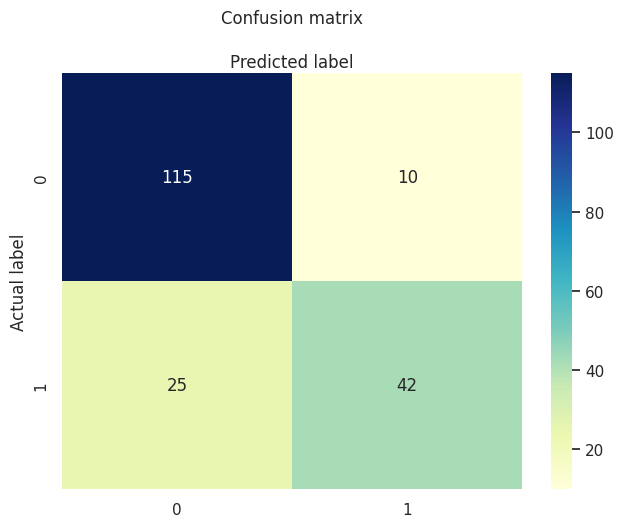

In [21]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [22]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



I got a classification rate of 80%, considered as good accuracy.

Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your logistic regression model predicted patients are going to suffer from diabetes, that patients have 73% of the time.

Recall: If there are patients who have diabetes in the test set and your logistic regression model can identify it 57% of the time.

Moreover, a Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

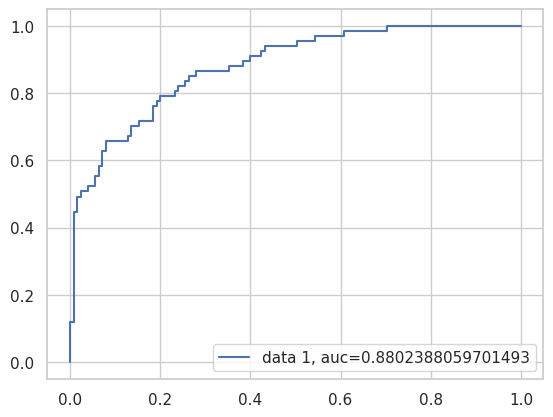

In [23]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

Overall, advantages of logistic regression include high computation powr, easy to implement, easily interpretable, and used widely by data analystst/scientists. It also doesn't require scaling of features and provides a probability score for observations. But disadvantages include how logistic regression cannot handle a large number of categorical features or variables- vulnerable to overfitting.